In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [27]:
df=pd.read_csv("dataset/mental_health.csv",encoding="ISO-8859-1")
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [28]:
df.dtypes

text     object
label     int64
dtype: object

In [29]:
df["label"].unique()

array([0, 1], dtype=int64)

In [30]:
msg=df.text
msg

0        dear american teens question dutch person hear...
1        nothing look forward lifei dont many reasons k...
2        music recommendations im looking expand playli...
3        im done trying feel betterthe reason im still ...
4        worried  year old girl subject domestic physic...
                               ...                        
27972    posting everyday people stop caring  religion ...
27973    okay definetly need hear guys opinion ive pret...
27974    cant get dog think ill kill myselfthe last thi...
27975    whats point princess bridei really think like ...
27976    got nudes person might might know snapchat do ...
Name: text, Length: 27977, dtype: object



**REMOVING SPECIAL CHARECTERS**


In [31]:
msg=msg.str.replace('[^a-zA-Z0-9]+'," ")
msg

0        dear american teens question dutch person hear...
1        nothing look forward lifei dont many reasons k...
2        music recommendations im looking expand playli...
3        im done trying feel betterthe reason im still ...
4        worried  year old girl subject domestic physic...
                               ...                        
27972    posting everyday people stop caring  religion ...
27973    okay definetly need hear guys opinion ive pret...
27974    cant get dog think ill kill myselfthe last thi...
27975    whats point princess bridei really think like ...
27976    got nudes person might might know snapchat do ...
Name: text, Length: 27977, dtype: object

**CREATING A WORD CLOUD**

In [32]:
# Assuming 'text_column' is the column in your DataFrame that contains the text data
text_corpus = ' '.join(df['text'].values)

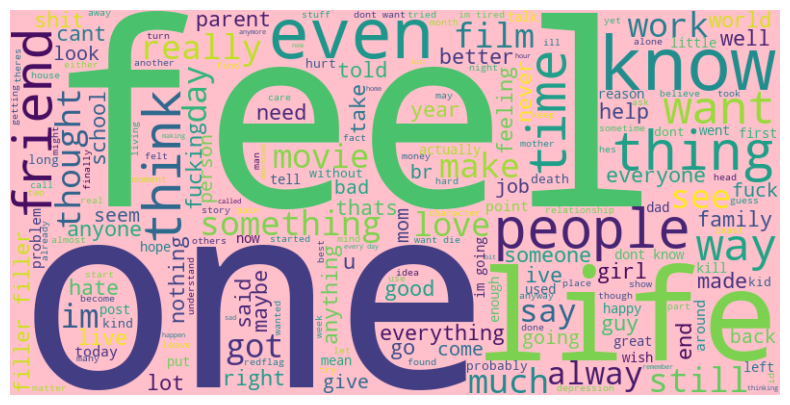

In [33]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='pink').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**STEMMING AND TOKENISING**

In [34]:
import nltk
from nltk.stem import PorterStemmer
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
stemmer=PorterStemmer()
msg=msg.apply(lambda line:[stemmer.stem(token.lower()) for token in word_tokenize(line)]).apply(lambda token:" ".join(token))

In [36]:
msg=msg.apply(lambda line:[token for token in word_tokenize(line) if len(token)>2]).apply(lambda y:" ".join(y))

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

**VECTORIZATION**

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data_vec=tf.fit_transform(msg)
print(data_vec)

  (0, 29298)	0.21987335376865433
  (0, 39982)	0.11542773806418838
  (0, 27535)	0.07087011507761481
  (0, 19399)	0.32470250783624194
  (0, 47933)	0.372419638753305
  (0, 44123)	0.33639795722210636
  (0, 936)	0.16631805303177513
  (0, 26996)	0.33555630114030005
  (0, 47494)	0.09441474711962639
  (0, 13703)	0.19490088675448736
  (0, 52123)	0.10351927938950346
  (0, 18562)	0.07760461136099839
  (0, 20133)	0.2557670702200546
  (0, 20981)	0.1825297804935439
  (0, 35727)	0.11664502599696015
  (0, 13554)	0.30463028499702755
  (0, 38145)	0.1590745553723292
  (0, 46841)	0.19902012880657122
  (0, 1704)	0.20149949431691566
  (0, 11058)	0.24791849091720664
  (1, 31738)	0.20058092375972741
  (1, 20495)	0.27095666506100075
  (1, 51894)	0.12561824585016856
  (1, 28844)	0.15213638236772406
  (1, 10868)	0.16056417535186107
  :	:
  (27976, 33256)	0.43157692706403256
  (27976, 43636)	0.2111327975386876
  (27976, 30298)	0.34846311827534304
  (27976, 23409)	0.12449187696439876
  (27976, 43632)	0.17897635439

In [39]:
y=df['label'].values
y

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.3,random_state=1)

**MODEL CREATION**

In [41]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
sv=SVC()
rf=RandomForestClassifier()
models=[sv]
for model in models:
  print(model)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))

SVC()
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4252
           1       0.94      0.89      0.91      4142

    accuracy                           0.92      8394
   macro avg       0.92      0.92      0.92      8394
weighted avg       0.92      0.92      0.92      8394



In [42]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(sv)

# Save the model to disk
with open('svm_sentimentModel.pkl', 'wb') as file:
    pickle.dump(sv, file)

with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tf, file)

In [49]:
y_new=model.predict(tf.transform(["im done trying feel betterthe reason "]))
if y_new==1:
    print("positive")
if y_new==0:
    print("negative")

positive
